In [1]:
%matplotlib inline
import pandas as pd
import requests
import numpy as np

import roc_results

In [2]:
response = requests.get('http://localhost:8000/result/')
rec = []
for r in response.json():
    svm = r.get('algorithm').get('svm')
    if svm.get('kernel') == 'linear':
        rec.append({
            'kernel': svm.get('kernel'),
            'c': svm.get('c'),
            'roc_auc_score': r.get('roc_auc_score'),
            'stock': r.get('stock')
        })
df = pd.DataFrame(rec)

In [3]:
log_res = []
for i, row in df.iterrows():
    log_res.append(roc_results.results.get(row['stock']))
df['log_res'] = log_res
df['diff'] = df['roc_auc_score'] - log_res

In [4]:
print(len(df['stock'].unique()))
print(len(df[df['log_res'] <= df['roc_auc_score']]['stock'].unique()))

98
54


In [5]:
df[df['log_res'] <= df['roc_auc_score']]

,c,kernel,roc_auc_score,stock,log_res,diff
0,100.0,linear,0.563885,9094,0.563683,0.000202
1,1000.0,linear,0.563885,9094,0.563683,0.000202
4,1.0,linear,0.550741,9270,0.538618,0.012124
5,10.0,linear,0.550741,9270,0.538618,0.012124
6,100.0,linear,0.550741,9270,0.538618,0.012124
7,1000.0,linear,0.550741,9270,0.538618,0.012124
10,1.0,linear,0.557572,10166,0.546252,0.011320
11,10.0,linear,0.557572,10166,0.546252,0.011320
12,100.0,linear,0.557572,10166,0.546252,0.011320
13,1000.0,linear,0.557255,10166,0.546252,0.011003


In [6]:
df.groupby('stock').aggregate({'roc_auc_score': np.max})

,roc_auc_score
stock,
10166,0.557572
10470,0.594828
10484,0.545433
10508,0.567924
10795,0.605074
1080,0.593027
10887,0.547967
11038,0.588559
1113,0.572656


In [10]:
df_bests = df.loc[df.groupby('stock')['roc_auc_score'].idxmax()]
# I would like to have all of them
df_bests

,c,kernel,roc_auc_score,stock,log_res,diff
10,1.0,linear,0.557572,10166,0.546252,0.011320
320,1.0,linear,0.594828,10470,0.568184,0.026644
470,1.0,linear,0.545433,10484,0.562517,-0.017084
243,10.0,linear,0.567924,10508,0.560902,0.007022
176,1.0,linear,0.605074,10795,0.625769,-0.020695
488,1.0,linear,0.593027,1080,0.596527,-0.003499
189,10.0,linear,0.547967,10887,0.547431,0.000537
500,1.0,linear,0.588559,11038,0.579517,0.009042
172,100.0,linear,0.572656,1113,0.562853,0.009803
194,1.0,linear,0.593165,11234,0.600489,-0.007324


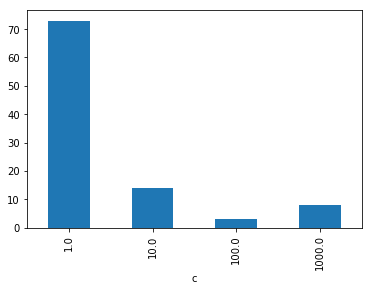

In [8]:
df_bests.groupby('c')['c'].count().plot(kind='bar')

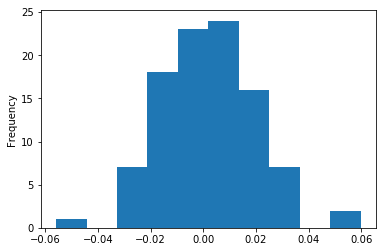

In [17]:
df_bests['diff'].plot(kind='hist')